In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.stats.diagnostic import het_arch

In [2]:
datos_cartera=pd.read_csv('Datos/Transformados/cartera.csv', index_col=[0], parse_dates=[0])
datos_cartera.head()

,AAPL,CAT,MSFT
fecha,,,
2018-06-07,48.37500,156.289993,100.879997
2018-06-08,47.87750,155.320007,101.629997
2018-06-11,47.79000,156.350000,101.050003
2018-06-12,48.08000,157.485000,101.309998
2018-06-13,47.66625,154.700000,100.849998


In [ ]:
# corr_pearson = datos_cartera.corr(method="pearson")

In [ ]:
# fig, ax =plt.subplots(1,1, figsize=(10,10))

# sns.heatmap(corr_pearson, annot=True,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
# ax.set_yticklabels(ax.get_yticklabels(),rotation=0,horizontalalignment='right')
# ax.set_title("Spearman Correlation Matrix");

### AAPL

<Axes: xlabel='fecha'>

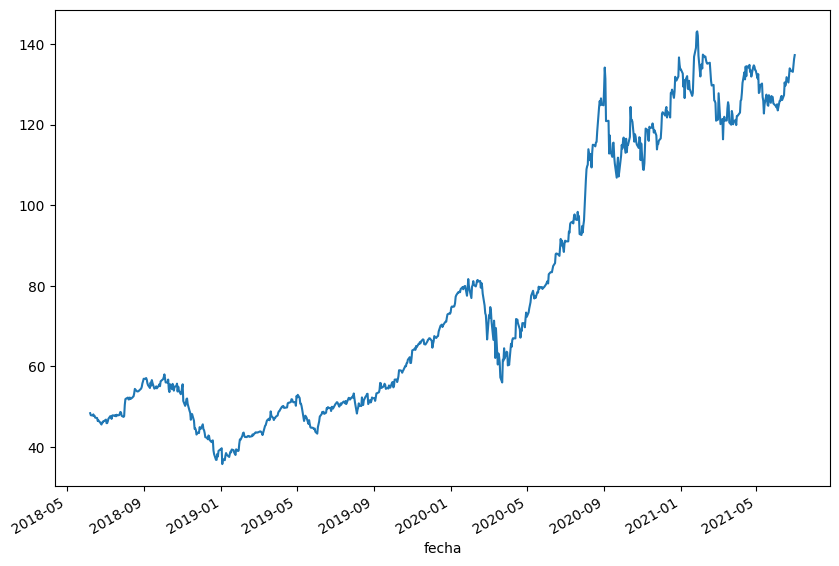

In [55]:
datos_cartera['AAPL'].plot(figsize=(10,7))

In [56]:
datos_cartera['AAPL'].isna().sum()

np.int64(0)

In [57]:
datos_cartera['AAPL'].dtype

dtype('float64')

In [58]:
datos_cartera['AAPL'].resample('Y').count()

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\825100696.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['AAPL'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: AAPL, dtype: int64

ESTACIONALIDAD

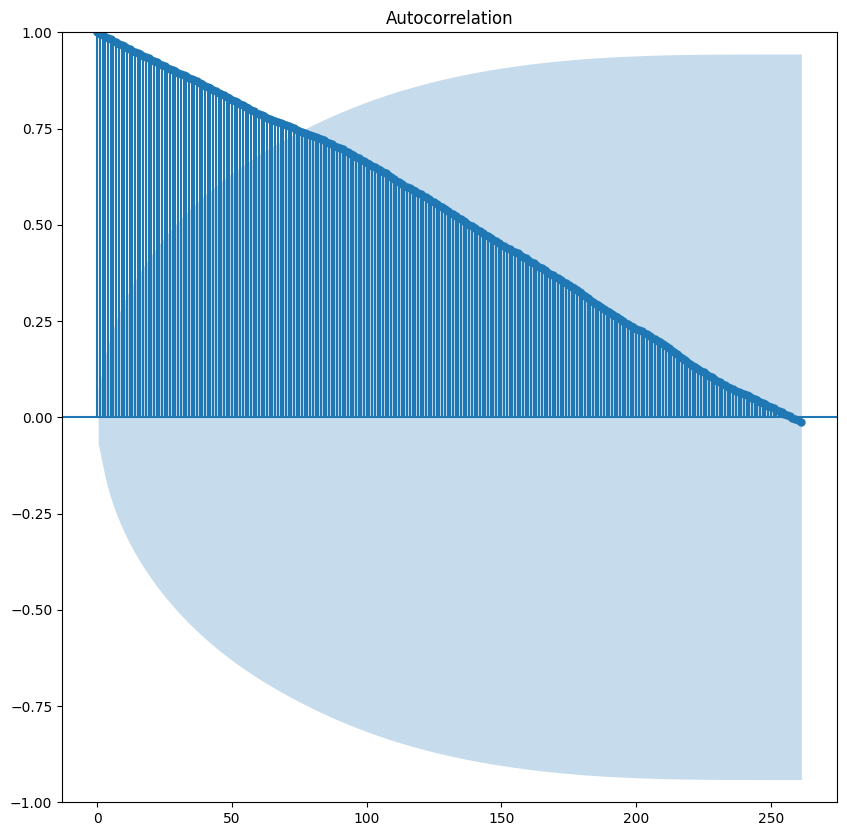

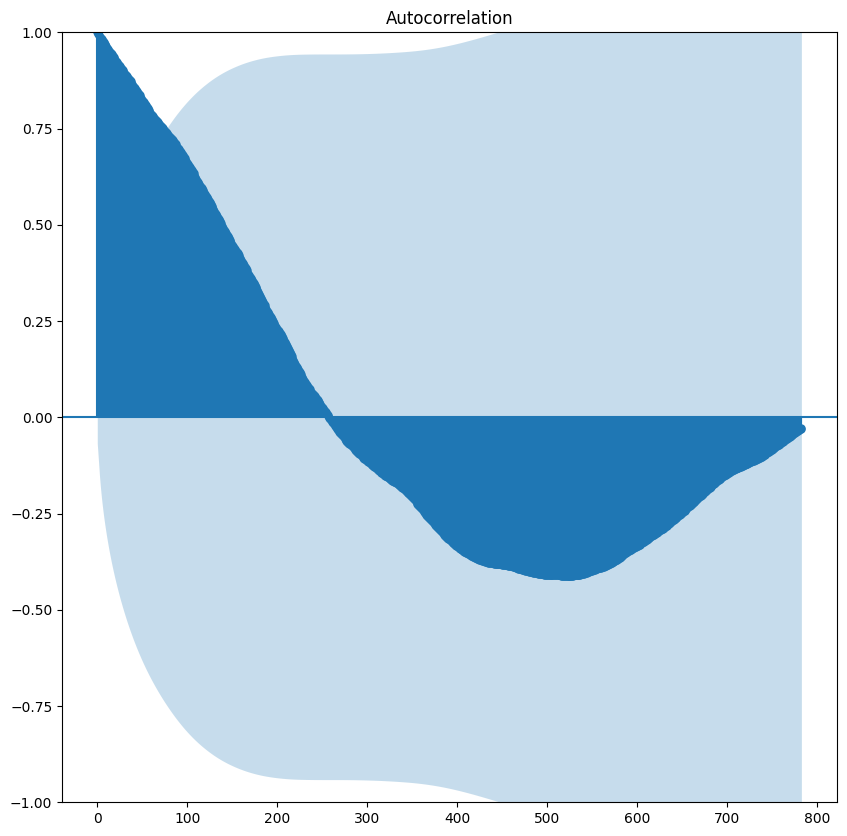

In [59]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['AAPL'], lags=261);
tsaplots.plot_acf(datos_cartera['AAPL'], lags=(261*3));

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

TENDENCIA

<Axes: xlabel='fecha'>

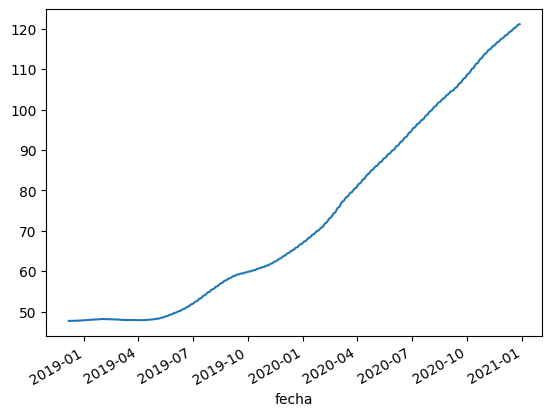

In [8]:
decomposicion_aapl=seasonal_decompose(datos_cartera['AAPL'], model='multiplicative', period=261)
trend_aapl=decomposicion_aapl.trend
trend_aapl.dropna(inplace=True)
trend_aapl.plot()

In [9]:
datos_cartera['residuo_AAPL'] = datos_cartera['AAPL'] - trend_aapl
datos_cartera['residuo_AAPL'].dropna(inplace=True)
datos_cartera

,AAPL,CAT,MSFT,residuo_AAPL
fecha,,,,
2018-06-07,48.375000,156.289993,100.879997,NaN
2018-06-08,47.877500,155.320007,101.629997,NaN
2018-06-11,47.790000,156.350000,101.050003,NaN
2018-06-12,48.080000,157.485000,101.309998,NaN
2018-06-13,47.666250,154.700000,100.849998,NaN
...,...,...,...,...
2021-06-25,133.410000,219.340000,266.690000,NaN
2021-06-28,133.110000,216.310000,265.020000,NaN
2021-06-29,134.780000,216.270000,268.720000,NaN


<Axes: xlabel='fecha'>

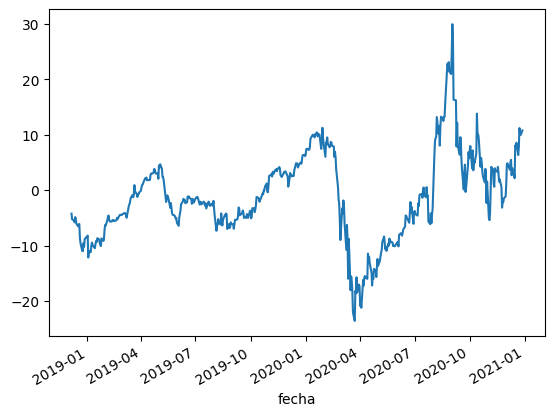

In [10]:
datos_cartera['residuo_AAPL'].plot()

In [11]:
def test_estacionario(residuo):

    residuo=residuo.dropna()
    adf_test = adfuller(residuo, autolag='AIC')
    p_adf = adf_test[1]

    kpss_test = kpss(residuo, nlags="auto")
    p_kpss = kpss_test[1]

    arch_test = het_arch(residuo)
    p_arch = arch_test[1]

    if p_adf < 0.05 and p_kpss > 0.05:
        estacionario = "La serie es ESTACIONARIA"
    else:
        estacionario = "La serie NO es estacionaria"

    if p_arch < 0.05:
        heterocedasticidad = "Existe HETEROCEDASTICIDAD (varianza no constante)"
    else:
        heterocedasticidad = "No hay heterocedasticidad (varianza constante)"

    resultados = {
        'ADF_pvalue': p_adf,
        'KPSS_pvalue': p_kpss,
        'ARCH_pvalue': p_arch,
        'Conclusión_estacionariedad': estacionario,
        'Conclusión_heterocedasticidad': heterocedasticidad
    }
    
    return resultados

In [12]:
test_aapl=test_estacionario(datos_cartera['residuo_AAPL'])
test_aapl

{'ADF_pvalue': np.float64(0.22849989581876595),
 'KPSS_pvalue': np.float64(0.06546031163641847),
 'ARCH_pvalue': np.float64(8.515958552554994e-90),
 'Conclusión_estacionariedad': 'La serie NO es estacionaria',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

<Axes: xlabel='fecha'>

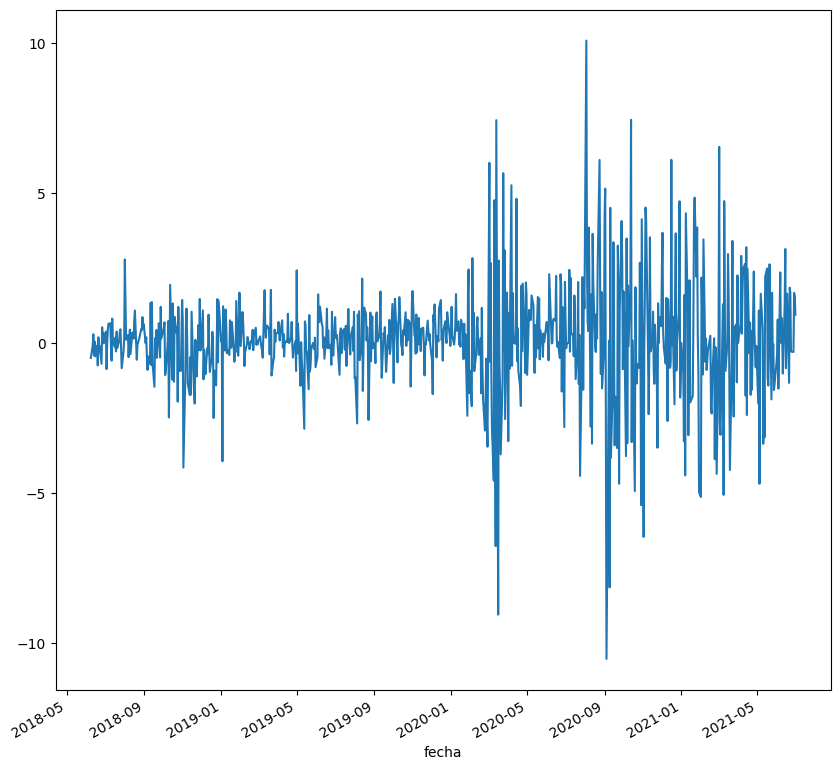

In [60]:
diff_aapl=datos_cartera['AAPL'].diff()
datos_cartera['residuo_AAPL2']=diff_aapl
datos_cartera['residuo_AAPL2'].plot()

In [61]:
test_estacionario(diff_aapl)

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': 0.0,
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(2.366462891192108e-21),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

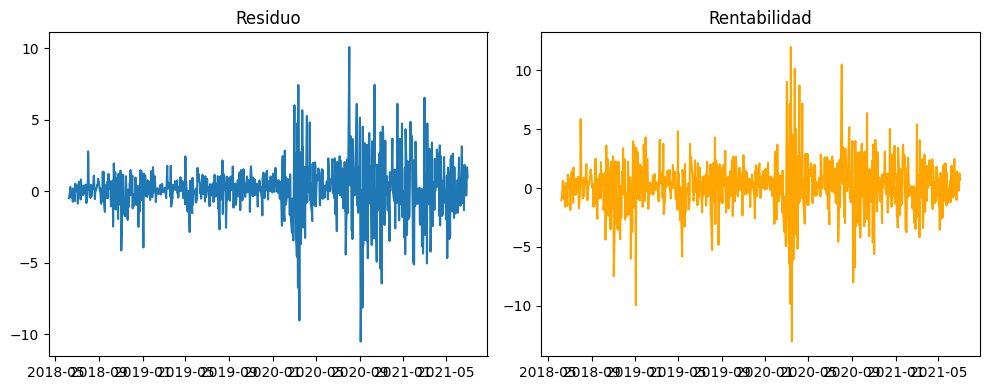

In [62]:
datos_cartera['rent_aapl'] = 100*datos_cartera['AAPL'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_AAPL2'])
axes[0].set_title("Residuo")

axes[1].plot(datos_cartera['rent_aapl'], color='orange')
axes[1].set_title("Rentabilidad")

plt.tight_layout()  
plt.show()

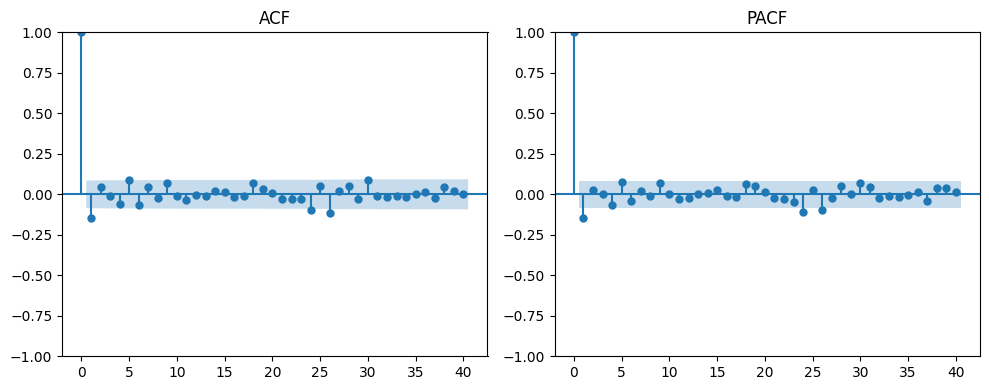

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['residuo_AAPL2'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF")

plot_pacf(datos_cartera['residuo_AAPL2'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF")

plt.tight_layout()
plt.show()


In [ ]:
from arch import arch_model

In [18]:
garch11 = arch_model(datos_cartera['residuo_AAPL2'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_AAPL2'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 338205.81963534036
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1369.353901518266
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1184.5288244085168
Iteration:      4,   Func. Count:     30,   Neg. LLF: 927.026189609275
Iteration:      5,   Func. Count:     37,   Neg. LLF: 910.6142237176912
Iteration:      6,   Func. Count:     44,   Neg. LLF: 919.4315224220942
Iteration:      7,   Func. Count:     51,   Neg. LLF: 898.1906549636014
Iteration:      8,   Func. Count:     57,   Neg. LLF: 898.1751812099961
Iteration:      9,   Func. Count:     63,   Neg. LLF: 898.2150460604759
Iteration:     10,   Func. Count:     70,   Neg. LLF: 898.170500151846
Iteration:     11,   Func. Count:     76,   Neg. LLF: 898.1704916406094
Iteration:     12,   Func. Count:     81,   Neg. LLF: 898.1704910648692
Optimization terminated successfully    (Exit mode 0)
            Current function value: 898.1704916406094
            Iterations: 12
 

In [19]:
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)


      lb_stat  lb_pvalue
10  12.953426   0.226287
20  21.125576   0.389775
(np.float64(13.600896995646757), np.float64(0.19198637567867047), 1.3669934064460236, 0.1922285894791091)
alpha+beta = 0.9178133764128835


Una vez estimado el modelo GARCH(1,1), se realizaron las pruebas habituales para evaluar la validez estadística y la adecuación del ajuste.

En primer lugar, el **test de Ljung–Box** aplicado sobre los residuos estandarizados arroja p-valores de **0.226 (lag 10)** y **0.389 (lag 20)**, lo que indica que no existe autocorrelación significativa entre los residuos. Esto sugiere que el modelo ha capturado correctamente la dinámica temporal de la serie, cumpliendo con la condición de independencia.

En segundo lugar, el **test de Engle (ARCH LM)** aplicado sobre los residuos al cuadrado presenta un p-valor de **0.192**, por lo que no se rechaza la hipótesis nula de homocedasticidad. Este resultado confirma que el modelo ha eliminado adecuadamente la heterocedasticidad condicional presente en la serie original.

Por último, la suma de los parámetros **α + β = 0.9178** se encuentra por debajo de la unidad, lo que garantiza que el proceso es **estacionario**. Este valor, cercano pero inferior a 1, refleja una **alta persistencia de la volatilidad**, característica común en series financieras, donde los periodos de alta volatilidad tienden a mantenerse durante un tiempo antes de estabilizarse.

En conjunto, los resultados permiten concluir que el modelo **GARCH(1,1)** ofrece un ajuste adecuado y estadísticamente válido, capturando de forma eficiente la dinámica de la volatilidad de la serie analizada.

## Predicción de la volatilidad

Volatilidades históricas

In [20]:
std_diario_apple = datos_cartera['rent_aapl'].std()
print(f'Volatilidad diaria: {round(std_diario_apple,2)}%')

std_mensual_apple = np.sqrt(21) * std_diario_apple
print(f'\nVolatilidad mensual: {round(std_mensual_apple,2)}%')

std_anual_apple = np.sqrt(252) * std_diario_apple
print(f'\nVolatilidad anual: {round(std_anual_apple,2)}%')

Volatilidad diaria: 2.14%

Volatilidad mensual: 9.8%

Volatilidad anual: 33.96%


In [ ]:
# indice=datos_cartera.index
# indice=indice[len(indice):None:-1] 
# start_loc = 0
# end_loc = np.where(indice >= '2020-07-01')[0].min()

In [ ]:
# forecasts = {}
# for i in range(70):
#     last = end_loc + i
#     if last >= len(indice):
#         break  # evita salirse del rango
#     res = garch11.fit(first_obs=start_loc, last_obs=last, disp='off')
#     temp = res.forecast(horizon=1, reindex=True).variance
#     fcast = temp.iloc[last]
#     forecasts[fcast.name] = fcast

# print('Done!')
# pred_variance_expand = pd.DataFrame(forecasts).T

In [ ]:
# forecasts = {}
# for i in range(70):
#     res = garch11.fit(first_obs=start_loc + i, last_obs=i + end_loc, disp='off')
#     temp = res.forecast(horizon=1, reindex=True).variance
#     fcast = temp.iloc[i + end_loc - 1]
#     forecasts[fcast.name] = fcast
# print(' Done!')
# pred_variance_fixed = pd.DataFrame(forecasts).T

### MSFT

<Axes: xlabel='fecha'>

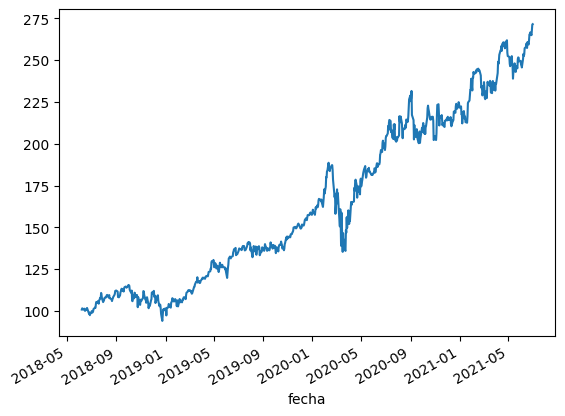

In [21]:
datos_cartera['MSFT'].plot()

In [22]:
datos_cartera['MSFT'].isna().sum()

np.int64(0)

In [23]:
datos_cartera['MSFT'].resample('Y').count()

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\1920217640.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['MSFT'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: MSFT, dtype: int64

ESTACIONALIDAD

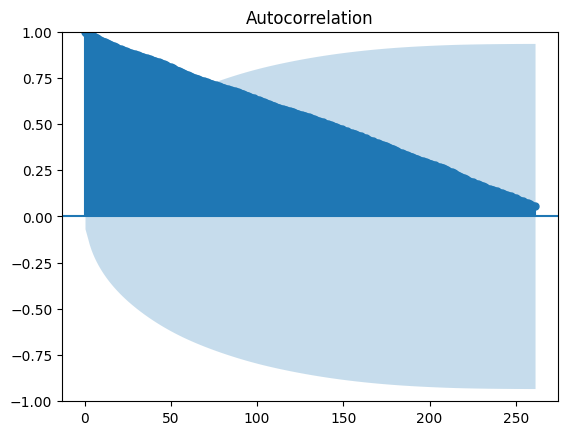

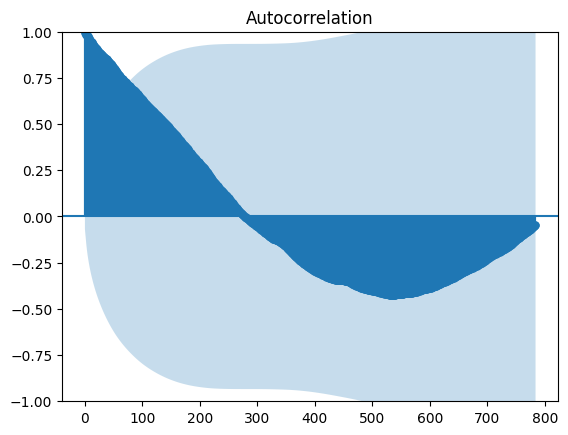

In [24]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['MSFT'], lags=261);
tsaplots.plot_acf(datos_cartera['MSFT'], lags=(261*3));

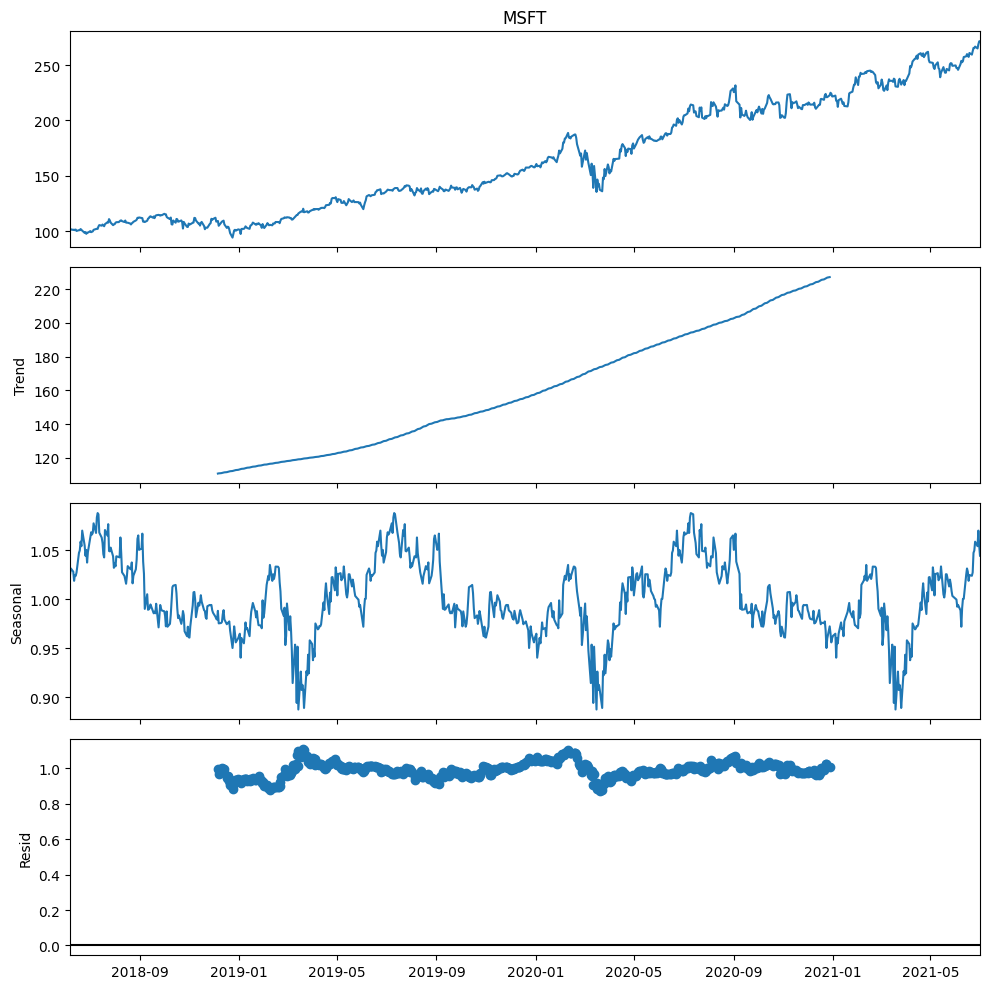

In [25]:
decomposicion_msft = seasonal_decompose(datos_cartera["MSFT"], model='multiplicativa', period=261)
plt.rcParams['figure.figsize'] = (10, 10)
decomposicion_msft.plot()
plt.show()

TENDENCIA

<Axes: xlabel='fecha'>

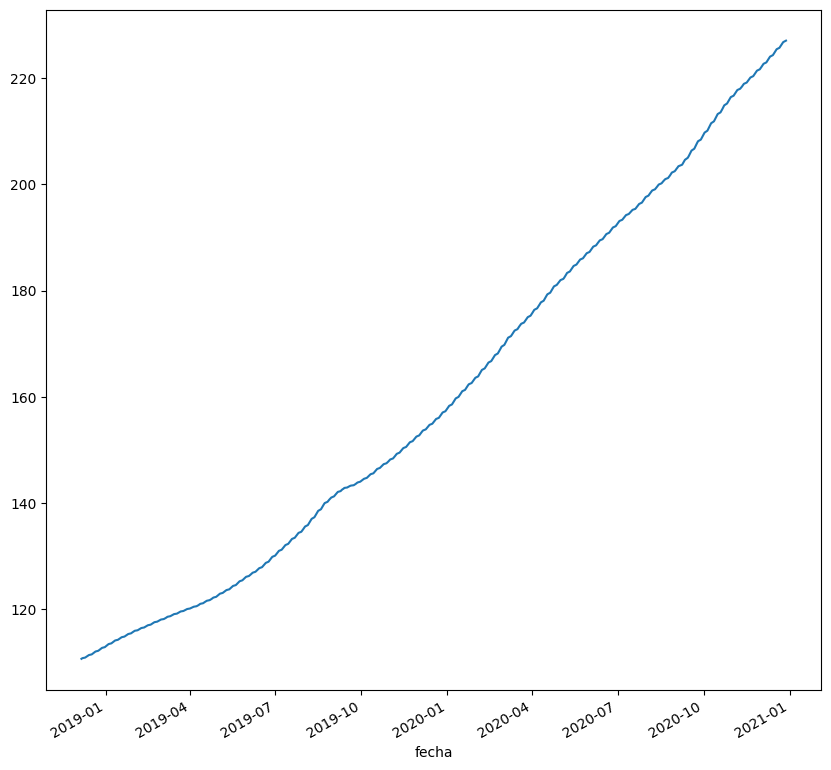

In [26]:
trend_msft=decomposicion_msft.trend
trend_msft.dropna(inplace=True)
trend_msft.plot()

ESTACIONALIDAD

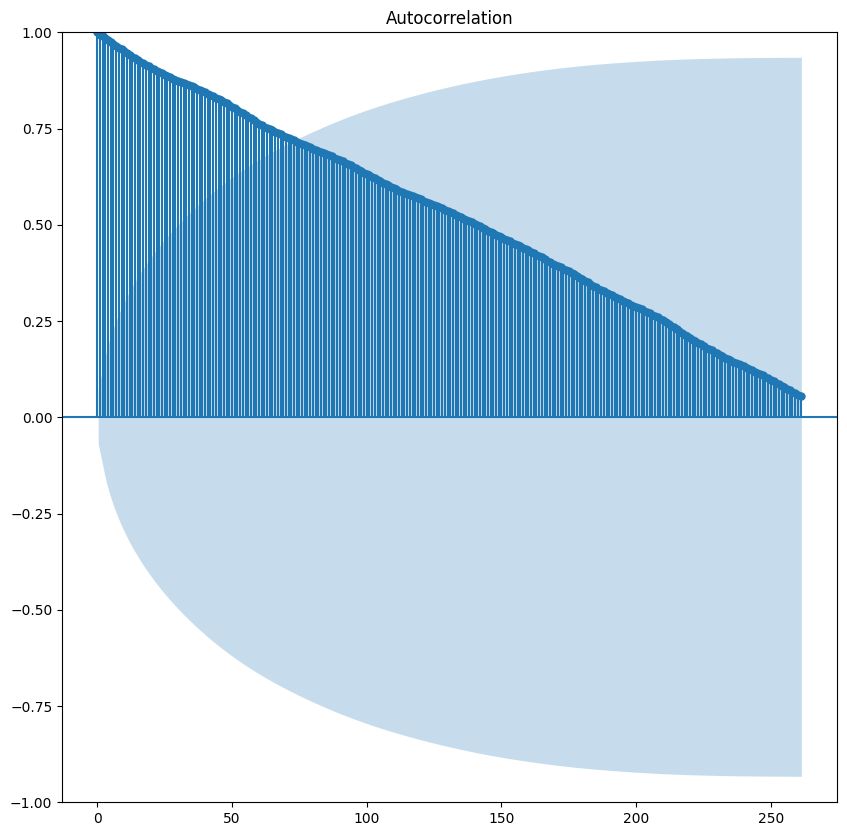

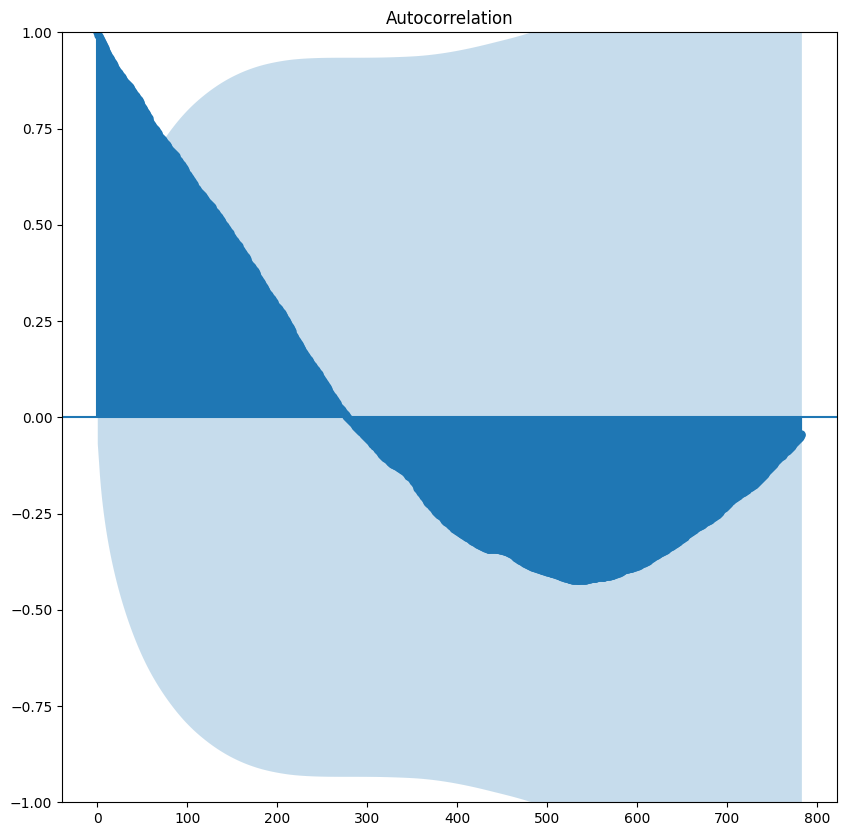

In [27]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(datos_cartera['MSFT'], lags=261);
tsaplots.plot_acf(datos_cartera['MSFT'], lags=(261*3));

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

In [29]:
datos_cartera['residuo_MSFT'] = datos_cartera['MSFT'] - trend_msft
datos_cartera['residuo_MSFT'].dropna(inplace=True)
datos_cartera.head()

,AAPL,CAT,MSFT,residuo_AAPL,residuo_AAPL2,rent_aapl,residuo_MSFT
fecha,,,,,,,
2018-06-07,48.37500,156.289993,100.879997,NaN,NaN,NaN,NaN
2018-06-08,47.87750,155.320007,101.629997,NaN,NaN,-1.028424,NaN
2018-06-11,47.79000,156.350000,101.050003,NaN,NaN,-0.182758,NaN
2018-06-12,48.08000,157.485000,101.309998,NaN,NaN,0.606822,NaN
2018-06-13,47.66625,154.700000,100.849998,NaN,NaN,-0.860545,NaN


<Axes: xlabel='fecha'>

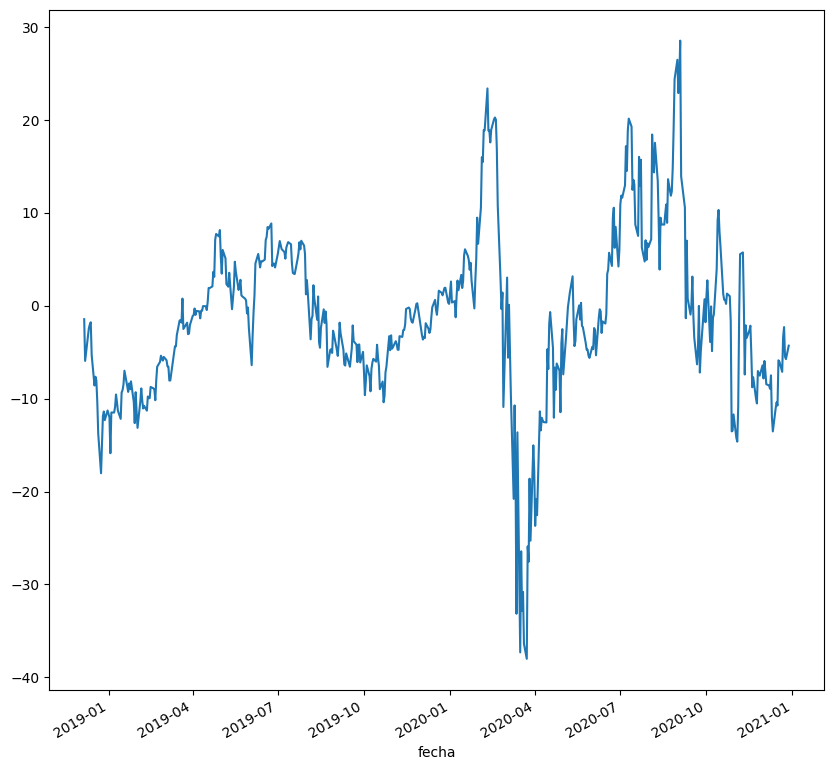

In [30]:
datos_cartera['residuo_MSFT'].plot()

In [46]:
datos_cartera['residuo_MSFT2']=datos_cartera['MSFT'].diff()

Text(0.5, 1.0, 'Residuo MSFT')

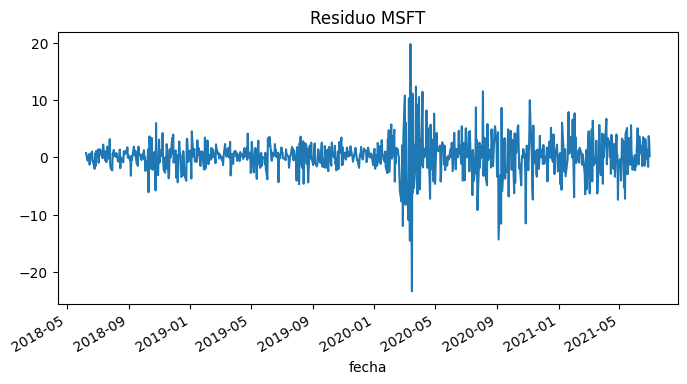

In [47]:
plt.figure(figsize=(8,4))
datos_cartera['residuo_MSFT2'].plot()
plt.title('Residuo MSFT')

In [48]:
test_msft=test_estacionario(datos_cartera['residuo_MSFT2'])
test_msft

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(7.756230692136409e-14),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(3.3196327917578183e-49),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

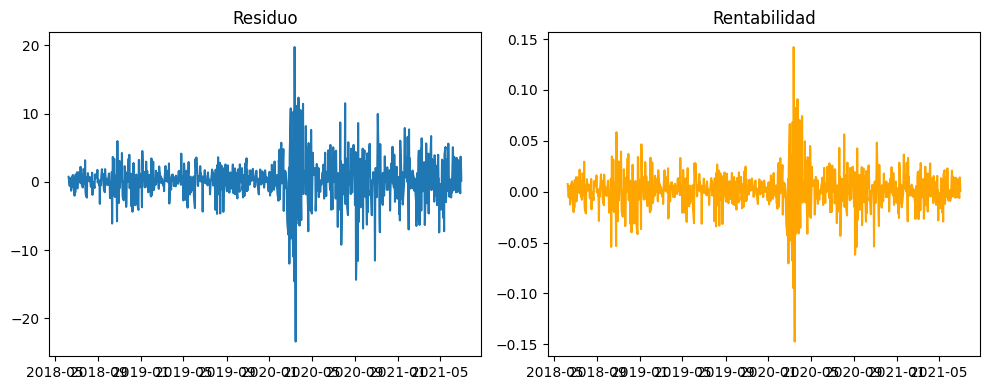

In [49]:
datos_cartera['rent_msft'] = datos_cartera['MSFT'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_MSFT2'])
axes[0].set_title("Residuo")

axes[1].plot(datos_cartera['rent_msft'], color='orange')
axes[1].set_title("Rentabilidad")

plt.tight_layout()  
plt.show()

GARCH

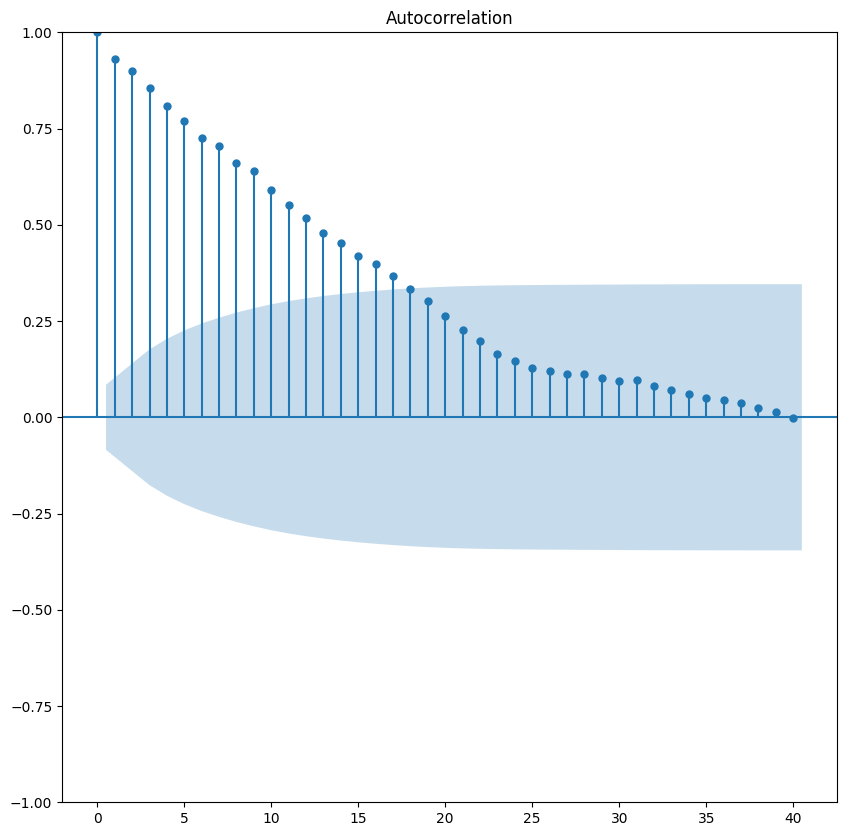

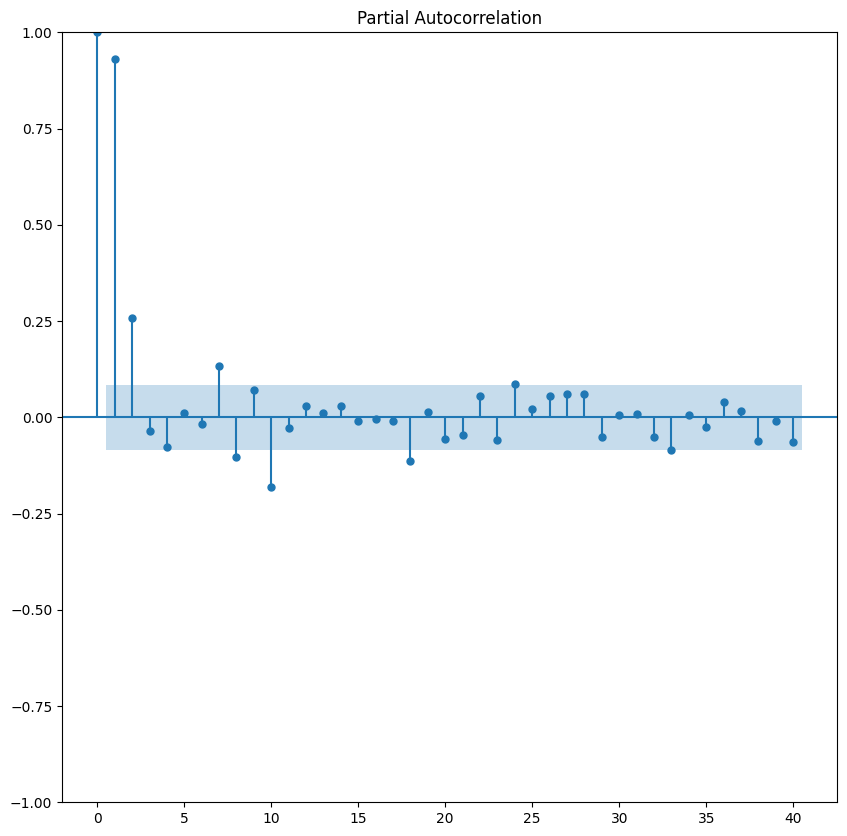

In [32]:
tsaplots.plot_acf(datos_cartera['residuo_MSFT'].dropna(), lags=40)
tsaplots.plot_pacf(datos_cartera['residuo_MSFT'].dropna(), lags=40)
plt.show()

In [33]:
garch11 = arch_model(datos_cartera['residuo_MSFT'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_MSFT'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 8561624.801415388
Iteration:      2,   Func. Count:     14,   Neg. LLF: 222315.85154766878
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1751.219600038633
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1694.696929538969
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1706.5731694479769
Iteration:      6,   Func. Count:     42,   Neg. LLF: 3759.9241503835046
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2463067.5212179194
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1686.1885557297965
Iteration:      9,   Func. Count:     62,   Neg. LLF: 1685.9957714259738
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1685.8499692050452
Iteration:     11,   Func. Count:     74,   Neg. LLF: 1685.8326808300428
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1685.8308524221447
Iteration:     13,   Func. Count:     86,   Neg. LLF: 1685.8308220259948
Iteration:     14,   Func. Count:     92,   Neg. LLF: 

In [34]:
# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)

        lb_stat  lb_pvalue
10  2004.249814        0.0
20  3005.280242        0.0
(np.float64(0.8630133113018759), np.float64(0.9999128212701679), 0.0846385789059253, 0.9999177664930066)
alpha+beta = 1.0360899537674795


# CAT

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\2515794608.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  datos_cartera['CAT'].resample('Y').count()


fecha
2018-12-31    148
2019-12-31    261
2020-12-31    261
2021-12-31    127
Freq: YE-DEC, Name: CAT, dtype: int64

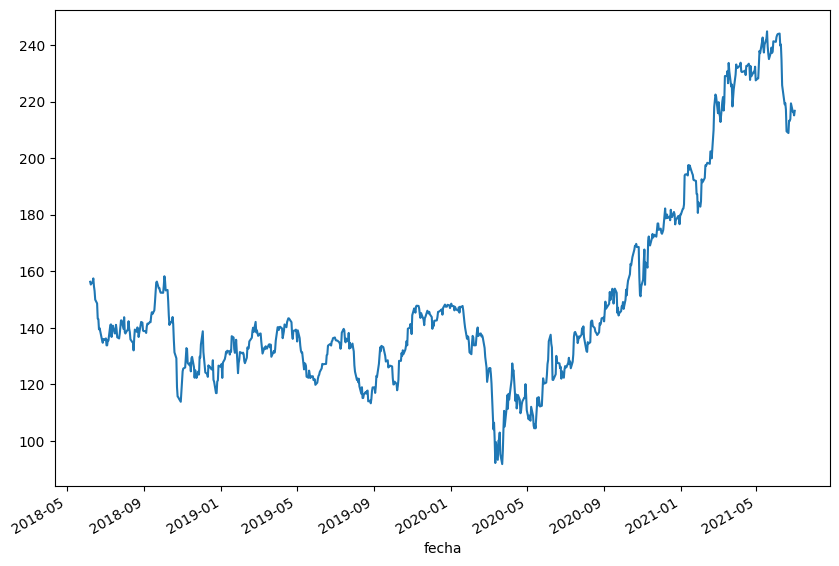

In [35]:
datos_cartera['CAT'].plot(figsize=(10,7))
datos_cartera['CAT'].isna().sum()
datos_cartera['CAT'].dtype
datos_cartera['CAT'].resample('Y').count()

### ESTACIONALIDAD

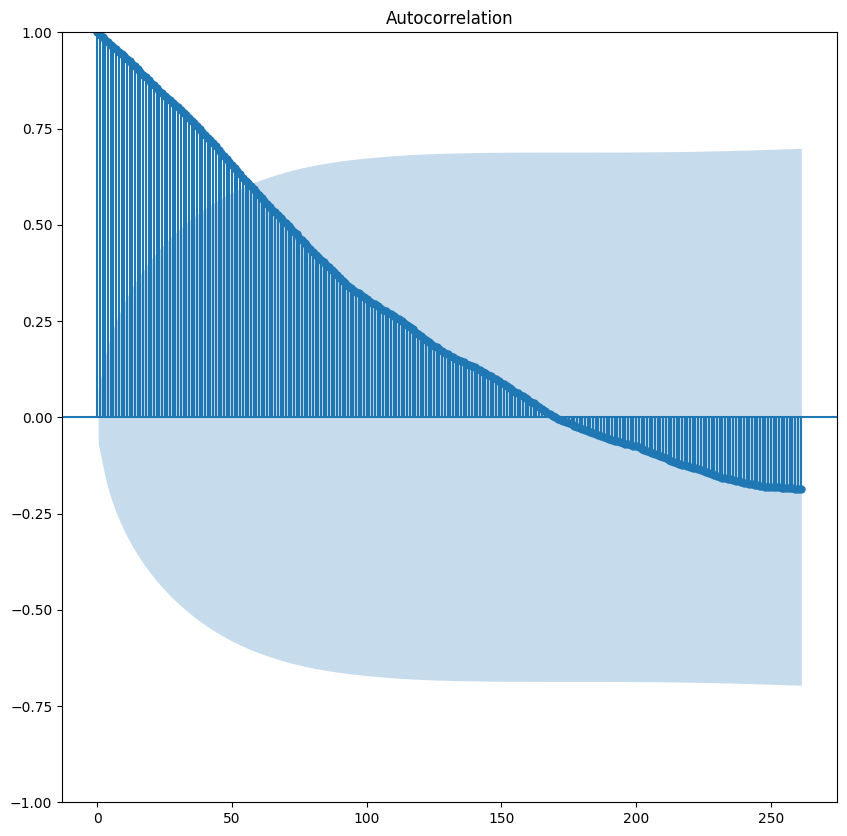

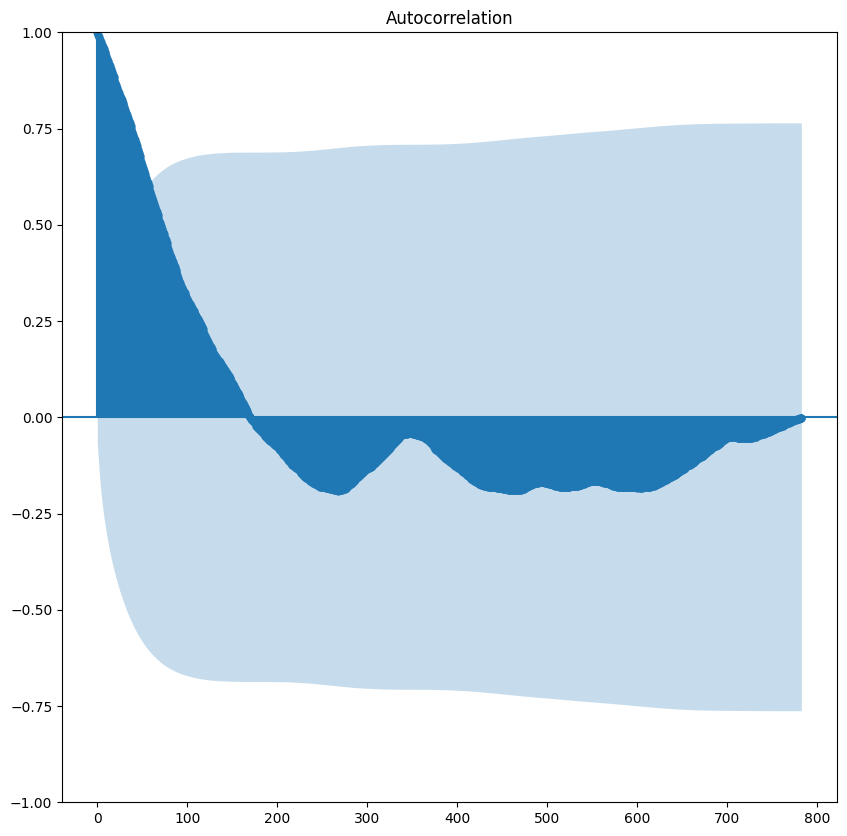

In [36]:
tsaplots.plot_acf(datos_cartera['CAT'], lags=261);
tsaplots.plot_acf(datos_cartera['CAT'], lags=(261*3));

Como no es una series estacional, no hay que sacar el residuo mediante la descomposición. 
Para conseguir el residuo, hay que restar la tendencia a la serie original.

### TENDENCIA

<Axes: xlabel='fecha'>

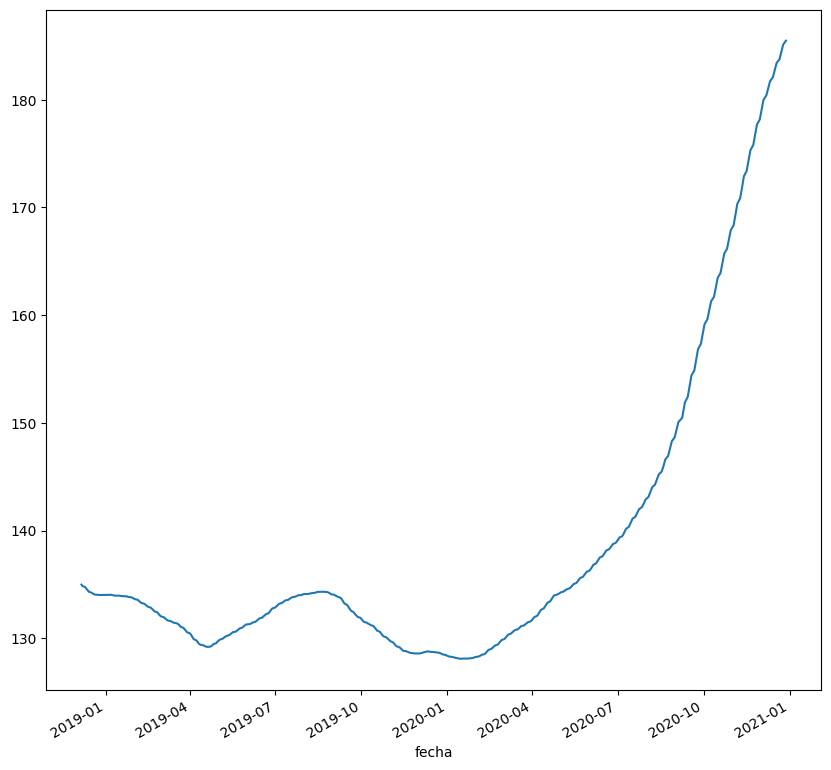

In [37]:
decomposicion_aapl=seasonal_decompose(datos_cartera['CAT'], model='multiplicative', period=261)
trend=decomposicion_aapl.trend
trend.dropna(inplace=True)
trend.plot()

<Axes: xlabel='fecha'>

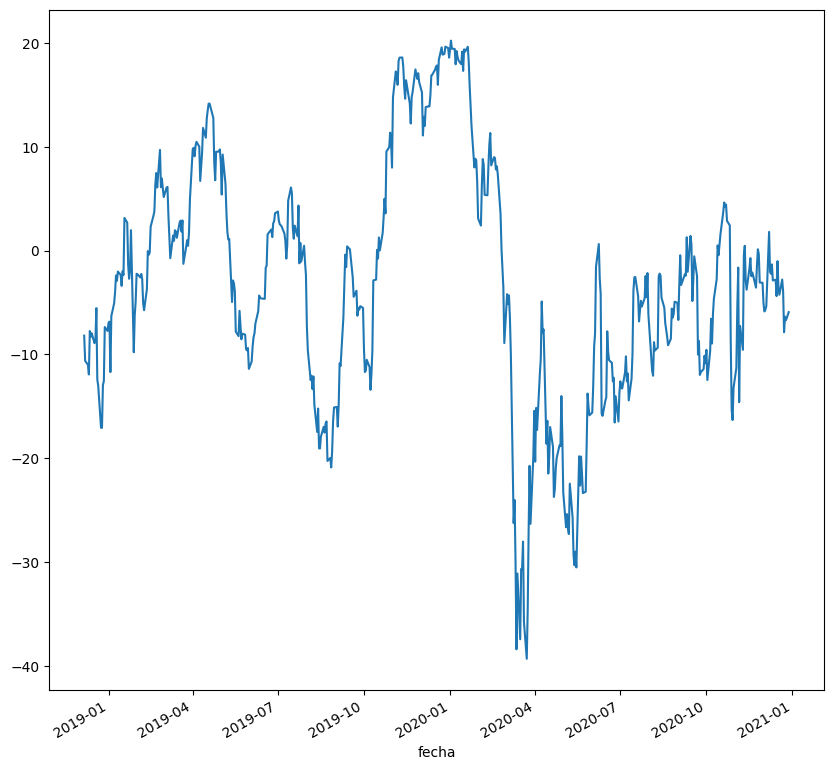

In [50]:
datos_cartera['resido_CAT'] = datos_cartera['CAT'] - trend
datos_cartera['resido_CAT'].dropna(inplace=True)
datos_cartera.head()
datos_cartera['resido_CAT'].plot()

In [51]:
datos_cartera['residuo_CAT2']=datos_cartera['CAT'].diff()

In [52]:
test_cat=test_estacionario(datos_cartera['residuo_CAT2'])
test_cat

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(2.1009896839553222e-30),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(3.173071386611018e-06),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'Existe HETEROCEDASTICIDAD (varianza no constante)'}

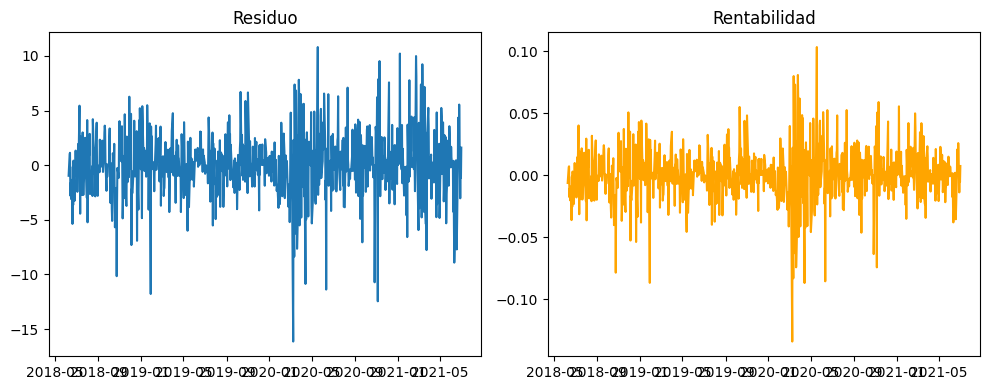

In [53]:
datos_cartera['rent_cat'] = datos_cartera['CAT'].pct_change()
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(datos_cartera['residuo_CAT2'])
axes[0].set_title("Residuo")

axes[1].plot(datos_cartera['rent_cat'], color='orange')
axes[1].set_title("Rentabilidad")

plt.tight_layout()  
plt.show()

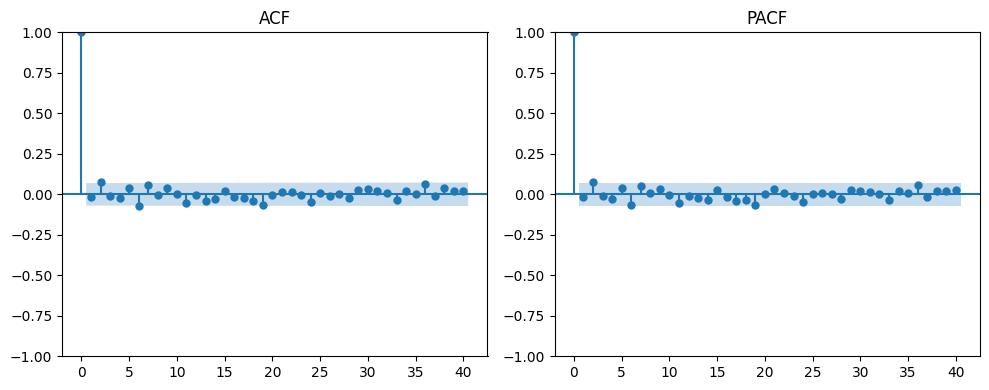

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_acf(datos_cartera['residuo_CAT'].dropna(), lags=40, ax=axes[0])
axes[0].set_title("ACF")

plot_pacf(datos_cartera['residuo_CAT'].dropna(), lags=40, ax=axes[1])
axes[1].set_title("PACF")

plt.tight_layout()
plt.show()

In [42]:
garch11 = arch_model(datos_cartera['residuo_CAT'].dropna(), p=1, q=1, o=1,vol='GARCH', mean='constant')
garch22 = arch_model(datos_cartera['residuo_CAT'].dropna(), p=2, q=2, o=1,vol='GARCH', mean='constant')

res11 = garch11.fit()
res22 = garch22.fit()

# Fit the model
print(res11.summary())
print(res22.summary())

print(res11.aic, res11.bic, res11.loglikelihood)
print(res22.aic, res22.bic, res22.loglikelihood)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2290.8114889535454
Iteration:      2,   Func. Count:     17,   Neg. LLF: 922966668.8028572
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2184.637620169902
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1964.320479375597
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1972.5579595100762
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1989.0225598190098
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1956.7077258532806
Iteration:      8,   Func. Count:     64,   Neg. LLF: 1956.707780748336
Iteration:      9,   Func. Count:     71,   Neg. LLF: 1956.70767470671
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1956.7076747081242
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1956.70767470671
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      9,   Neg. LLF: 2482.590356542

In [43]:
test_estacionario(res11.std_resid)

C:\Users\PORTATIL\AppData\Local\Temp\ipykernel_8436\3505837973.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(residuo, nlags="auto")


{'ADF_pvalue': np.float64(2.3562204343351157e-30),
 'KPSS_pvalue': np.float64(0.1),
 'ARCH_pvalue': np.float64(0.8455857644842224),
 'Conclusión_estacionariedad': 'La serie es ESTACIONARIA',
 'Conclusión_heterocedasticidad': 'No hay heterocedasticidad (varianza constante)'}

In [44]:
# 1) Ljung-Box en residuos estandarizados (autocorrelación)
print(acorr_ljungbox(res11.std_resid, lags=[10, 20], return_df=True))

# 2) ARCH LM en residuos estandarizados al cuadrado (heterocedasticidad remanente)
print(het_arch(res11.std_resid**2))

# 3) Persistencia
params = res11.params
alpha = params.filter(like='alpha').sum()
beta  = params.filter(like='beta').sum()
print("alpha+beta =", alpha + beta)

      lb_stat  lb_pvalue
10  12.874404   0.230779
20  24.376413   0.226336
(np.float64(0.6884422031411486), np.float64(0.9999697344326778), 0.06794025914137752, 0.9999709258564402)
alpha+beta = 0.9701663331204863
